In [ ]:
import pandas as pd
import datetime as dt
import string
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Week 1 Tasks

In [3]:
Retail_train = pd.read_excel("train.xlsx")
Retail_test = pd.read_excel("test.xlsx")

###### Data Analysis of train and test datasets

In [5]:
Retail_train.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
6,561513,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,1,2011-07-27 15:12:00,4.13,NaN,United Kingdom
7,566591,23057,BEADED CHANDELIER T-LIGHT HOLDER,4,2011-09-13 14:53:00,4.95,16036.0,United Kingdom
8,564516,84970l,SINGLE HEART ZINC T-LIGHT HOLDER,3,2011-08-25 14:45:00,2.08,NaN,United Kingdom
9,573582,23082,SET 6 PAPER TABLE LANTERN HEARTS,6,2011-10-31 14:23:00,3.75,16633.0,United Kingdom


In [6]:
Retail_test.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom
5,544812,22420,LIPSTICK PEN BABY PINK,12,2011-02-23 15:58:00,0.83,NaN,United Kingdom
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom
7,548203,22672,FRENCH BATHROOM SIGN BLUE METAL,8,2011-03-29 16:40:00,4.95,NaN,United Kingdom
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom
9,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom


In [7]:
print('No. of rows and columns of train dataset :')
print(Retail_train.shape, '\n')
print('No. of rows and columns of test dataset :')
print(Retail_test.shape)

No. of rows and columns of train dataset :
(379336, 8) 

No. of rows and columns of test dataset :
(162573, 8)


In [8]:
print("Column names of train set :")
print('===========================')
print(Retail_train.columns,'\n')
print("Column names of test set :")
print('==========================')
print(Retail_test.columns)

Column names of train set :
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object') 

Column names of test set :
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [9]:
print('Train dataset structure information :')
print('=====================================')
print(Retail_train.info(), '\n')
print('Test dataset structure information :')
print('====================================')
print(Retail_test.info())

Train dataset structure information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB
None 

Test dataset structure information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo  

In [10]:
print('Count of each unique value in each column in train set :')
print('========================================================')
print(Retail_train.nunique(), '\n')
print('Count of each unique value in each column in test set :')
print('=======================================================')
print(Retail_test.nunique())

Count of each unique value in each column in train set :
InvoiceNo      23857
StockCode       4008
Description     4132
Quantity         619
InvoiceDate    21712
UnitPrice       1267
CustomerID      4353
Country           38
dtype: int64 

Count of each unique value in each column in test set :
InvoiceNo      20166
StockCode       3759
Description     3825
Quantity         434
InvoiceDate    18686
UnitPrice        792
CustomerID      4224
Country           38
dtype: int64


In [11]:
print('Train dataset description :')
print('===========================')
print(Retail_train.describe(), '\n')
print('Test dataset description :')
print('==========================')
print(Retail_test.describe())

Train dataset description :
            Quantity      UnitPrice     CustomerID
count  379336.000000  379336.000000  285076.000000
mean        9.517272       4.681474   15288.302463
std       259.070548     105.799352    1712.323663
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13958.750000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000 

Test dataset description :
            Quantity      UnitPrice     CustomerID
count  162573.000000  162573.000000  121753.000000
mean        9.633863       4.446940   15286.257866
std        43.862669      71.344746    1716.591938
min     -3667.000000  -11062.060000   12347.000000
25%         1.000000       1.250000   13940.000000
50%         3.000000       2.080000   15150.000000
75%        10.000000       4.130000   16794.000000
max      3114.000000   13541.330000   18287.000000


### Checking and removing duplicate values in  both datasets :

In [12]:
Is_Duplicate = Retail_train.duplicated()
Is_Duplicate.value_counts()

False    376663
True       2673
dtype: int64

In [13]:
Is_Duplicate = Retail_test.duplicated()
Is_Duplicate.value_counts()

False    162103
True        470
dtype: int64

In [14]:
Retail_train.drop_duplicates(keep = 'first', inplace = True)
Retail_train.duplicated().value_counts()

False    376663
dtype: int64

In [15]:
Retail_test.drop_duplicates(keep = 'first', inplace = True)
Retail_test.duplicated().value_counts()

False    162103
dtype: int64

In [16]:
Retail_train.shape, Retail_test.shape

((376663, 8), (162103, 8))

###### Checking that removing duplicate values has not inadvertently removed any unique value from the columns, if so then the unique count will be different from the previous one we perform. ### 

In [17]:
print('Count of unique values in each Column in train dataset :')
print('========================================================')
print(Retail_train.nunique(), '\n')
print('Count of unique values in each Column in test dataset :')
print('=======================================================')
print(Retail_test.nunique())

Count of unique values in each Column in train dataset :
InvoiceNo      23857
StockCode       4008
Description     4132
Quantity         619
InvoiceDate    21712
UnitPrice       1267
CustomerID      4353
Country           38
dtype: int64 

Count of unique values in each Column in test dataset :
InvoiceNo      20166
StockCode       3759
Description     3825
Quantity         434
InvoiceDate    18686
UnitPrice        792
CustomerID      4224
Country           38
dtype: int64


### Missing value treatment in both dataset : 

###### Counting no. of missing values in each column ###

In [18]:
print('No. of null values in each column in train dataset :')
print('====================================================')
Retail_train.isnull().sum()

No. of null values in each column in train dataset :


InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94243
Country            0
dtype: int64

In [19]:
print('No. of null values in each column in test dataset :')
print('===================================================')
Retail_test.isnull().sum()

No. of null values in each column in test dataset :


InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40818
Country            0
dtype: int64

So, there are 2 columns with missing values - 'Description' and 'CustomerID'

I have also noticed that few rows of 'UnitPrice' column has value as 0, which doesnot make sense. An item with 
unit price 0 is same as no item. It also won't effect the overall calculation of total amount. And the description column has null value where unit price is 0. So, I removed all those rows with UnitPrice as 0.

In [20]:
Retail_train.UnitPrice.sort_values()

173043   -11062.06
159270        0.00
288590        0.00
159274        0.00
353564        0.00
            ...   
101732    13541.33
191530    16453.71
266443    16888.02
3743      17836.46
302181    38970.00
Name: UnitPrice, Length: 376663, dtype: float64

In [21]:
Retail_test.UnitPrice.sort_values()

152119   -11062.06
161979        0.00
64354         0.00
113428        0.00
138856        0.00
            ...   
73468      7006.83
96054      7427.97
161819     8142.75
126924     8286.22
131131    13541.33
Name: UnitPrice, Length: 162103, dtype: float64

In [22]:
Retail_train = Retail_train.drop(Retail_train[Retail_train['UnitPrice'] == 0].index, axis=0)
Retail_train.UnitPrice.sort_values()

173043   -11062.060
13898         0.001
361772        0.001
38037         0.030
110196        0.030
            ...    
101732    13541.330
191530    16453.710
266443    16888.020
3743      17836.460
302181    38970.000
Name: UnitPrice, Length: 374959, dtype: float64

In [23]:
Retail_test = Retail_test.drop(Retail_test[Retail_test['UnitPrice'] == 0].index, axis=0)
Retail_test.UnitPrice.sort_values()

152119   -11062.060
60598         0.001
72380         0.001
149071        0.010
141021        0.040
            ...    
73468      7006.830
96054      7427.970
161819     8142.750
126924     8286.220
131131    13541.330
Name: UnitPrice, Length: 161294, dtype: float64

Checked the count of missing value again and found that the 'Description' column has no missing value for both sets

In [24]:
Retail_train.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     92570
Country            0
dtype: int64

In [25]:
Retail_test.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40018
Country            0
dtype: int64

###### I have noticed and verified that for every cancelled item, a new invoice number prefixed with 'C' is generated and Quantity is marked as a negative value. Only with CustomerID value we can identify who had made the cancellation but with null CustomerID there is no way of knowing who made the cancellation. So, if we generate a new customer ID for these cancelled trsactions, it will look as if the customer has made only cancellation and no purchase. Thus I removed all those rows with Quantity in negative (ie, item cancelled) and CustomerID as null.

In [26]:
Retail_train[(Retail_train['Quantity']<0) & Retail_train['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1732,C577346,M,Manual,-1,2011-11-18 15:25:00,530.25,NaN,United Kingdom
3743,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
5231,C564498,BANK CHARGES,Bank Charges,-1,2011-08-25 14:22:00,77.63,NaN,United Kingdom
8876,C553854,22053,EMPIRE DESIGN ROSETTE,-1,2011-05-19 13:13:00,1.25,NaN,United Kingdom
9334,C547904,AMAZONFEE,AMAZON FEE,-1,2011-03-28 12:02:00,219.76,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
371988,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,20.55,NaN,United Kingdom
373462,C540854,22461,SAVOY ART DECO CLOCK,-1,2011-01-12 09:54:00,12.75,NaN,United Kingdom
377377,C566578,M,Manual,-1,2011-09-13 13:33:00,92.93,NaN,United Kingdom
377581,C575153,22947,WOODEN ADVENT CALENDAR RED,-1,2011-11-08 16:15:00,33.17,NaN,United Kingdom


In [27]:
Retail_train = Retail_train.drop(Retail_train[(Retail_train['Quantity']<0) 
                                              & Retail_train['CustomerID'].isnull()].index).reset_index(drop=True)

In [28]:
Retail_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
...,...,...,...,...,...,...,...,...
374692,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
374693,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,NaN,United Kingdom
374694,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
374695,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


In [29]:
print(Retail_train[(Retail_train['Quantity']<0) & Retail_train['CustomerID'].isnull()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [30]:
Retail_test[(Retail_test['Quantity']<0) & Retail_test['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
210,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,9.74,NaN,United Kingdom
438,C544581,S,SAMPLES,-1,2011-02-21 14:32:00,92.00,NaN,United Kingdom
944,C537251,22418,10 COLOUR SPACEBOY PEN,-7,2010-12-06 10:45:00,0.85,NaN,United Kingdom
2379,C547725,22710,WRAP I LOVE LONDON,-25,2011-03-25 10:43:00,0.42,NaN,United Kingdom
5066,C579907,22169,FAMILY ALBUM WHITE PICTURE FRAME,-2,2011-12-01 08:48:00,7.65,NaN,EIRE
...,...,...,...,...,...,...,...,...
153598,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,7.00,NaN,United Kingdom
153743,C546943,BANK CHARGES,Bank Charges,-1,2011-03-18 11:11:00,56.93,NaN,United Kingdom
158202,C559949,22699,ROSES REGENCY TEACUP AND SAUCER,-2,2011-07-14 10:42:00,2.95,NaN,EIRE
159485,C546948,S,SAMPLES,-1,2011-03-18 11:20:00,50.99,NaN,United Kingdom


In [31]:
Retail_test = Retail_test.drop(Retail_test[(Retail_test['Quantity']<0) 
                                           & Retail_test['CustomerID'].isnull()].index).reset_index(drop=True)

In [32]:
Retail_test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom
...,...,...,...,...,...,...,...,...
161169,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom
161170,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland
161171,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom
161172,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom


In [33]:
print(Retail_test[(Retail_test['Quantity']<0) & Retail_test['CustomerID'].isnull()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


Here, I am checking whether there are any invoices that has CustomerID in some rows and missing in others. So that I can replace the missing ones with available ones. 

Creating 2 dataframe, 1 with all rows with null customerID and the other with no null CustomerID

In [34]:
All_CustomerID1 = Retail_train.copy()
No_CustomerID1 = pd.DataFrame(Retail_train[Retail_train['CustomerID'].isnull()])
All_CustomerID1 = All_CustomerID1.drop(All_CustomerID1[All_CustomerID1['CustomerID'].isnull()].index, axis=0)
print('No. of Invoices that are missing Customer ID for train dataset = ', No_CustomerID1.InvoiceNo.nunique())

No. of Invoices that are missing Customer ID for train dataset =  1329


There are 1329 unique Invoices that are missing CustomerID in train dataset. So we have to generate 1329 new CustomerID for train dataset.

Checking for common invoice in both dataset, which came as empty, meaning no common InvoiceNo.

In [35]:
Invoice_set1 = set(All_CustomerID1.InvoiceNo.unique())
Invoice_set2 = set(No_CustomerID1.InvoiceNo.unique())
print('Any common InvoiceNo for train dataset = ', Invoice_set1 & Invoice_set2)

Any common InvoiceNo for train dataset =  set()


Did same for test dataset

In [36]:
All_CustomerID2 =Retail_test.copy()
No_CustomerID2 = pd.DataFrame(Retail_test[Retail_test['CustomerID'].isnull()])
All_CustomerID2 = All_CustomerID2.drop(All_CustomerID2[All_CustomerID2['CustomerID'].isnull()].index, axis=0)
print('No. of Invoice missing Customer ID for test dataset = ', No_CustomerID2.InvoiceNo.nunique())

No. of Invoice missing Customer ID for test dataset =  1182


In [37]:
Invoice_set1 = set(All_CustomerID2.InvoiceNo.unique())
Invoice_set2 = set(No_CustomerID2.InvoiceNo.unique())
print('Any common InvoiceNo for test dataset = ', Invoice_set1 & Invoice_set2)

Any common InvoiceNo for test dataset =  set()


Checking for common invoices in train and test dataset.

In [38]:
Invoice_set1 = set(No_CustomerID1.InvoiceNo.unique())
Invoice_set2 = set(No_CustomerID2.InvoiceNo.unique())
Common_invoice_null = Invoice_set1 & Invoice_set2
print('No of InvoiceNo common for train and test datasets with missing CustomerID = ', len(Common_invoice_null))

No of InvoiceNo common for train and test datasets with missing CustomerID =  1081


In [39]:
Invoice_set1 = set(All_CustomerID1.InvoiceNo.unique())
Invoice_set2 = set(All_CustomerID2.InvoiceNo.unique())
Common_invoice_not_null = Invoice_set1 & Invoice_set2
print('No of InvoiceNo common for train and test datasets without missing CustomerID = ', len(Common_invoice_not_null))

No of InvoiceNo common for train and test datasets without missing CustomerID =  16994


Though train and test are seperate and it doensn't matter whether they have same or different invoice numbers.
But since they are the part of same dataset, I have generated the same CustomerID number for invoices that are 
common in both the train and test dataset. Only invoices that are unique to both sets have different CustomerID.

In [40]:
def find_random():
    random_str = ""
    first_digit = random.randint(1, 9)
    random_str += str(first_digit)
    
    for i in range(4):
        random_str += str(random.randint(0, 9))
    random_str = int(random_str) 
    return random_str

In [41]:
def generate_custID():
    lst2 = list(Retail_train.CustomerID.unique())
    lst3 = list(Retail_test.CustomerID.unique())
    random_no = find_random()
    while (random_no in lst2 or random_no in lst3):
        random_no = find_random()
    lst2.append(random_no)
    lst3.append(random_no)
    return random_no

In [42]:
lst1 = No_CustomerID1.InvoiceNo.unique()
for i in lst1:
    cust_id = generate_custID()
    for j, k in enumerate(Retail_train.InvoiceNo):
        if i == k:
            Retail_train.loc[j, 'CustomerID'] = cust_id
    if i in Common_invoice_null:
        for l, m in enumerate(Retail_test.InvoiceNo):
            if i == m:
                Retail_test.loc[l, 'CustomerID'] = cust_id   

In [43]:
Retail_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [44]:
Retail_test.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     119
Country          0
dtype: int64

In [45]:
Null_CustomerID2 = pd.DataFrame(Retail_test[Retail_test['CustomerID'].isnull()])
Null_CustomerID2.InvoiceNo.nunique()

101

I have sucessfully replaced all null customer id with new id in train set but test set still have 101 invoices that have null 
customer id. So generate different set if ids for test set.

In [46]:
lst1 = Null_CustomerID2.InvoiceNo.unique()
for i in lst1:
    cust_id = generate_custID()
    for j, k in enumerate(Retail_test.InvoiceNo):
        if i == k:
            Retail_test.loc[j, 'CustomerID'] = cust_id                           

In [47]:
Retail_test.isnull().sum()    

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Missing value treatment  is complete. Lets' check one last time.

In [48]:
print('Total number of rows and columns after processing in train set :')
print('================================================================')
print(Retail_train.shape, '\n')
print('Total number of rows and columns after processing in test set :')
print('===============================================================')
print(Retail_test.shape)

Total number of rows and columns after processing in train set :
(374697, 8) 

Total number of rows and columns after processing in test set :
(161174, 8)


In [49]:
print('Is there any missing value left in train set ? ')
print('===============================================')
print(Retail_train.isnull().any(), '\n')
print('Is there any missing value left in test set ? ')
print('==============================================')
print(Retail_test.isnull().any())

Is there any missing value left in train set ? 
InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool 

Is there any missing value left in test set ? 
InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool


Changing datatype of 'CustomerID' to integer from float. Float doesn't make sense.

In [50]:
Retail_train.CustomerID = Retail_train.CustomerID.astype('int64')
Retail_train.CustomerID.dtype

dtype('int64')

In [51]:
Retail_test.CustomerID = Retail_test.CustomerID.astype('int64')
Retail_test.CustomerID.dtype

dtype('int64')

Removing dates from 2011-12-01 to 2011-12-09

In [52]:
D = Retail_train.InvoiceDate.astype(str)
D = [d.split()[0] for d in D]
D = pd.to_datetime(D)
Retail_train['D'] = D
D = pd.Series(pd.date_range('20111201', periods=9))
Retail_train = Retail_train.drop(Retail_train[Retail_train['D'].isin(D)].index, axis=0).reset_index(drop=True)
Retail_train.drop(columns='D', axis=1, inplace=True)
Retail_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,75299,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom
...,...,...,...,...,...,...,...,...
357173,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122,United Kingdom
357174,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,70084,United Kingdom
357175,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427,United Kingdom
357176,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752,United Kingdom


Checking for minimum and maximum date

In [53]:
Retail_train.InvoiceDate.min(), Retail_train.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:42:00'))

###### Creating Total_Amount column for train set

In [54]:
Retail_train['Total_Amount'] = Retail_train['Quantity'] * Retail_train['UnitPrice']
Retail_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,75299,United Kingdom,1.25
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,19.50
...,...,...,...,...,...,...,...,...,...
357173,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122,United Kingdom,-3.40
357174,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,70084,United Kingdom,16.98
357175,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427,United Kingdom,0.39
357176,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752,United Kingdom,75.00


###### Saving the processed train dataset to Retail_train.csv file inorder to use it for tableau dashboard creation.

In [55]:
Retail_train.to_csv('Retail_train.csv')

###### Data preprocessing complete and now it is ready for further analysis.

### Cohort Analysis

I have used only columns (InvoiceNO, Quantity, InvoiceDate, UnitPrice, CustomerID) of train dataset.

In [56]:
Retail_Cohort = pd.DataFrame(Retail_train.iloc[:, [0, 4, 6, 8]])
Retail_Cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount
0,558904,2011-07-04 16:18:00,75299,1.25
1,556072,2011-06-08 14:57:00,16126,30.00
2,551739,2011-05-04 10:58:00,18118,5.10
3,541658,2011-01-20 12:16:00,15529,0.85
4,538364,2010-12-10 17:26:00,14448,19.50
...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40
357174,539451,2010-12-17 16:59:00,70084,16.98
357175,572302,2011-10-23 14:47:00,15427,0.39
357176,559339,2011-07-07 16:49:00,13752,75.00


In [57]:
Retail_Cohort['Month'] = [m.strftime('%B') for m in Retail_Cohort.InvoiceDate]
Retail_Cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount,Month
0,558904,2011-07-04 16:18:00,75299,1.25,July
1,556072,2011-06-08 14:57:00,16126,30.00,June
2,551739,2011-05-04 10:58:00,18118,5.10,May
3,541658,2011-01-20 12:16:00,15529,0.85,January
4,538364,2010-12-10 17:26:00,14448,19.50,December
...,...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40,May
357174,539451,2010-12-17 16:59:00,70084,16.98,December
357175,572302,2011-10-23 14:47:00,15427,0.39,October
357176,559339,2011-07-07 16:49:00,13752,75.00,July


#### Weekly Retention Rate

Here I doing a weekly cohort analysis of number of customer. 

In [58]:
weekly_cohort = Retail_Cohort.copy()
weekly_cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount,Month
0,558904,2011-07-04 16:18:00,75299,1.25,July
1,556072,2011-06-08 14:57:00,16126,30.00,June
2,551739,2011-05-04 10:58:00,18118,5.10,May
3,541658,2011-01-20 12:16:00,15529,0.85,January
4,538364,2010-12-10 17:26:00,14448,19.50,December
...,...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40,May
357174,539451,2010-12-17 16:59:00,70084,16.98,December
357175,572302,2011-10-23 14:47:00,15427,0.39,October
357176,559339,2011-07-07 16:49:00,13752,75.00,July


In [59]:
def week_number_of_month(date_value):
    wn = str(((date_value.day - 1)//7)+1)
    w = 'Week ' + wn
    return w

week = weekly_cohort['InvoiceDate'].apply(week_number_of_month).astype(str)
weekly_cohort['Week_No.'] = week
weekly_cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount,Month,Week_No.
0,558904,2011-07-04 16:18:00,75299,1.25,July,Week 1
1,556072,2011-06-08 14:57:00,16126,30.00,June,Week 2
2,551739,2011-05-04 10:58:00,18118,5.10,May,Week 1
3,541658,2011-01-20 12:16:00,15529,0.85,January,Week 3
4,538364,2010-12-10 17:26:00,14448,19.50,December,Week 2
...,...,...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40,May,Week 4
357174,539451,2010-12-17 16:59:00,70084,16.98,December,Week 3
357175,572302,2011-10-23 14:47:00,15427,0.39,October,Week 4
357176,559339,2011-07-07 16:49:00,13752,75.00,July,Week 1


In [60]:
weekly_cohort_data = weekly_cohort.groupby(['Month', 'Week_No.'])['CustomerID'].nunique().reset_index()
weekly_cohort_data.rename(columns = {'CustomerID': 'No_of_Customers'}, inplace=True)
weekly_cohort_data['Month_Index'] = weekly_cohort_data.Month.map({'December' : 1, 'January' : 2, 'February' : 3, 
                                                                  'March' : 4, 'April' : 5, 'May' : 6, 'June' : 7, 
                                                                  'July' : 8, 'August' : 9, 'September' : 10, 
                                                                  'October' : 11, 'November' : 12}).astype(int)
weekly_cohort_data

,Month,Week_No.,No_of_Customers,Month_Index
0,April,Week 1,300,5
1,April,Week 2,353,5
2,April,Week 3,347,5
3,April,Week 4,190,5
4,August,Week 1,306,9
5,August,Week 2,282,9
6,August,Week 3,303,9
7,August,Week 4,335,9
8,August,Week 5,114,9
9,December,Week 1,479,1


In [61]:
weekly_cohort_pivot = pd.DataFrame(weekly_cohort_data.pivot_table(index = ['Month_Index', 'Month'],
                                                     columns = 'Week_No.',
                                                     values = 'No_of_Customers'))
weekly_cohort_pivot

,Week_No.,Week 1,Week 2,Week 3,Week 4,Week 5
Month_Index,Month,,,,,
1,December,479.0,438.0,366.0,50.0,NaN
2,January,203.0,273.0,226.0,294.0,88.0
3,February,264.0,248.0,270.0,287.0,NaN
4,March,299.0,260.0,330.0,308.0,205.0
5,April,300.0,353.0,347.0,190.0,NaN
6,May,296.0,393.0,362.0,357.0,72.0
7,June,338.0,355.0,344.0,285.0,107.0
8,July,318.0,308.0,340.0,323.0,95.0
9,August,306.0,282.0,303.0,335.0,114.0


In [62]:
total = [weekly_cohort_pivot.iloc[i, 0:6].sum().astype(int) for i in range(len(weekly_cohort_pivot))]
print("Total no. of customers in each month :")
print('=====================================')
print(total)

Total no. of customers in each month :
[1333, 1084, 1069, 1402, 1190, 1480, 1429, 1384, 1340, 1686, 1883, 2478]


Above pivot table showing the weekly distribution of customers for each month. Eg. In month of December there were total 1333
customers, of which there were 479, 438, 366 and 50 customers in week 1, week 2, week 3 and week 4 repectively. Week 5 as NaN
means there were no transactions. 

Below table shows the percentage of total customers in each week. 

In [63]:
weekly_cohort_pct = weekly_cohort_pivot.divide(total, axis=0)
weekly_cohort_pct.round(3)*100

,Week_No.,Week 1,Week 2,Week 3,Week 4,Week 5
Month_Index,Month,,,,,
1,December,35.9,32.9,27.5,3.8,NaN
2,January,18.7,25.2,20.8,27.1,8.1
3,February,24.7,23.2,25.3,26.8,NaN
4,March,21.3,18.5,23.5,22.0,14.6
5,April,25.2,29.7,29.2,16.0,NaN
6,May,20.0,26.6,24.5,24.1,4.9
7,June,23.7,24.8,24.1,19.9,7.5
8,July,23.0,22.3,24.6,23.3,6.9
9,August,22.8,21.0,22.6,25.0,8.5


Formatting the dataframe for proper visualization.

In [64]:
cohort_style = weekly_cohort_pct.style
cohort_style = cohort_style.format("{:.1%}")
cohort_style

,Week_No.,Week 1,Week 2,Week 3,Week 4,Week 5
Month_Index,Month,,,,,
1,December,35.9%,32.9%,27.5%,3.8%,nan%
2,January,18.7%,25.2%,20.8%,27.1%,8.1%
3,February,24.7%,23.2%,25.3%,26.8%,nan%
4,March,21.3%,18.5%,23.5%,22.0%,14.6%
5,April,25.2%,29.7%,29.2%,16.0%,nan%
6,May,20.0%,26.6%,24.5%,24.1%,4.9%
7,June,23.7%,24.8%,24.1%,19.9%,7.5%
8,July,23.0%,22.3%,24.6%,23.3%,6.9%
9,August,22.8%,21.0%,22.6%,25.0%,8.5%


In [65]:
styles = [dict(selector="th", props=[("font-size", "150%"), ("text-align", "center"), ('border', '2px solid black')]),
          dict(selector='td', props= [('border-color', 'grey'), ('border', '2px solid black')]),
          dict(selector="caption", props=[("caption-side", "top"), ("text-align", "center"), ("font-size", "170%")])]

cohort_style = (cohort_style.set_table_styles(styles).set_caption("Weekly Retention Rate"))

cm = sns.light_palette("orange", as_cmap=True)
cohort_style.background_gradient(cmap=cm, axis=1)

,Week_No.,Week 1,Week 2,Week 3,Week 4,Week 5
Month_Index,Month,,,,,
1,December,35.9%,32.9%,27.5%,3.8%,nan%
2,January,18.7%,25.2%,20.8%,27.1%,8.1%
3,February,24.7%,23.2%,25.3%,26.8%,nan%
4,March,21.3%,18.5%,23.5%,22.0%,14.6%
5,April,25.2%,29.7%,29.2%,16.0%,nan%
6,May,20.0%,26.6%,24.5%,24.1%,4.9%
7,June,23.7%,24.8%,24.1%,19.9%,7.5%
8,July,23.0%,22.3%,24.6%,23.3%,6.9%
9,August,22.8%,21.0%,22.6%,25.0%,8.5%


### Yearly Retention

In [66]:
yearly_cohort = Retail_Cohort.copy()

Below I an finding the month for each invoice and also the month in which a customer has made the first transaction.

In [67]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

yearly_cohort['Invoice_Month'] = yearly_cohort['InvoiceDate'].apply(get_month)
yearly_cohort['Cohort_Join_Month'] = yearly_cohort.groupby('CustomerID')['Invoice_Month'].transform('min')

yearly_cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount,Month,Invoice_Month,Cohort_Join_Month
0,558904,2011-07-04 16:18:00,75299,1.25,July,2011-07-01,2011-07-01
1,556072,2011-06-08 14:57:00,16126,30.00,June,2011-06-01,2011-02-01
2,551739,2011-05-04 10:58:00,18118,5.10,May,2011-05-01,2010-12-01
3,541658,2011-01-20 12:16:00,15529,0.85,January,2011-01-01,2010-12-01
4,538364,2010-12-10 17:26:00,14448,19.50,December,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40,May,2011-05-01,2011-02-01
357174,539451,2010-12-17 16:59:00,70084,16.98,December,2010-12-01,2010-12-01
357175,572302,2011-10-23 14:47:00,15427,0.39,October,2011-10-01,2011-10-01
357176,559339,2011-07-07 16:49:00,13752,75.00,July,2011-07-01,2011-04-01


Next I am finding the difference of months of the customer's first and last transactions. So that I know how long the customer
is being active.

In [68]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date(yearly_cohort, 'Invoice_Month')
cohort_year, cohort_month  = get_date(yearly_cohort, 'Cohort_Join_Month')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

yearly_cohort['Cohort_Index'] = year_diff * 12 + month_diff + 1
yearly_cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount,Month,Invoice_Month,Cohort_Join_Month,Cohort_Index
0,558904,2011-07-04 16:18:00,75299,1.25,July,2011-07-01,2011-07-01,1
1,556072,2011-06-08 14:57:00,16126,30.00,June,2011-06-01,2011-02-01,5
2,551739,2011-05-04 10:58:00,18118,5.10,May,2011-05-01,2010-12-01,6
3,541658,2011-01-20 12:16:00,15529,0.85,January,2011-01-01,2010-12-01,2
4,538364,2010-12-10 17:26:00,14448,19.50,December,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40,May,2011-05-01,2011-02-01,4
357174,539451,2010-12-17 16:59:00,70084,16.98,December,2010-12-01,2010-12-01,1
357175,572302,2011-10-23 14:47:00,15427,0.39,October,2011-10-01,2011-10-01,1
357176,559339,2011-07-07 16:49:00,13752,75.00,July,2011-07-01,2011-04-01,4


In [69]:
yearly_cohort.Cohort_Index.unique()

array([ 1,  5,  6,  2,  4,  7,  8,  9, 11, 12,  3, 10], dtype=int64)

From above we can see that there are 12 cohort indexes, which means a customer was active for that many months from making first 
transaction. Eg. If a customer has a Cohort_Index of 5 then that means the customer was active for next 5 months from making his/her first transaction.

In [70]:
yearly_cohort_data = yearly_cohort.groupby(['Cohort_Join_Month', 'Cohort_Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
yearly_cohort_data['Join_Month'] = [m.strftime('%B') for m in yearly_cohort_data.Cohort_Join_Month]
yearly_cohort_data.rename(columns = {'CustomerID': 'No_of_Customer'}, inplace=True)
yearly_cohort_data

,Cohort_Join_Month,Cohort_Index,No_of_Customer,Join_Month
0,2010-12-01,1,1073,December
1,2010-12-01,2,350,December
2,2010-12-01,3,297,December
3,2010-12-01,4,353,December
4,2010-12-01,5,332,December
...,...,...,...,...
73,2011-09-01,2,86,September
74,2011-09-01,3,97,September
75,2011-10-01,1,450,October
76,2011-10-01,2,91,October


In [71]:
yearly_cohort_data['Month_Index'] = yearly_cohort_data.Join_Month.map({'December' : 1, 'January' : 2, 'February' : 3, 
                                                                       'March' : 4, 'April' : 5, 'May' : 6, 'June' : 7, 
                                                                       'July' : 8, 'August' : 9, 'September' : 10, 
                                                                       'October' : 11, 'November' : 12}).astype(int)
yearly_cohort_data

,Cohort_Join_Month,Cohort_Index,No_of_Customer,Join_Month,Month_Index
0,2010-12-01,1,1073,December,1
1,2010-12-01,2,350,December,1
2,2010-12-01,3,297,December,1
3,2010-12-01,4,353,December,1
4,2010-12-01,5,332,December,1
...,...,...,...,...,...
73,2011-09-01,2,86,September,10
74,2011-09-01,3,97,September,10
75,2011-10-01,1,450,October,11
76,2011-10-01,2,91,October,11


In [72]:
yearly_cohort_pivot = yearly_cohort_data.pivot_table(index = ['Month_Index', 'Join_Month'],  
                                       columns = 'Cohort_Index',
                                       values = 'No_of_Customer')
yearly_cohort_pivot

,Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Month_Index,Join_Month,,,,,,,,,,,,
1,December,1073.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,459.0
2,January,515.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,NaN
3,February,475.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,NaN,NaN
4,March,563.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,NaN,NaN,NaN
5,April,393.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,NaN,NaN,NaN,NaN
6,May,392.0,60.0,48.0,48.0,59.0,69.0,74.0,NaN,NaN,NaN,NaN,NaN
7,June,371.0,46.0,43.0,62.0,57.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN
8,July,330.0,39.0,38.0,45.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,August,242.0,38.0,41.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above pivot table shows the retention of customer through the year. Eg. In December month, there were 1037 active customers, of which 350 were active next month, ie, January also and so on. Since there are 12 months from December to November, so December has 12 cohort index. January to November has 11 months so it has 11 cohort index and so on.

In [74]:
total = yearly_cohort_pivot.iloc[:,0]
yearly_cohort_pct = yearly_cohort_pivot.divide(total, axis = 0)
yearly_cohort_pct.round(3)*100

,Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Month_Index,Join_Month,,,,,,,,,,,,
1,December,100.0,32.6,27.7,32.9,30.9,34.2,32.7,30.0,30.3,33.6,32.1,42.8
2,January,100.0,19.8,23.3,20.2,27.4,23.7,21.9,21.2,25.6,28.7,30.5,NaN
3,February,100.0,19.2,15.2,21.3,21.5,19.2,20.0,21.3,20.4,24.6,NaN,NaN
4,March,100.0,14.4,19.5,16.5,17.9,13.5,20.1,18.3,22.2,NaN,NaN,NaN
5,April,100.0,17.0,16.5,15.3,15.5,18.1,17.6,19.8,NaN,NaN,NaN,NaN
6,May,100.0,15.3,12.2,12.2,15.1,17.6,18.9,NaN,NaN,NaN,NaN,NaN
7,June,100.0,12.4,11.6,16.7,15.4,21.6,NaN,NaN,NaN,NaN,NaN,NaN
8,July,100.0,11.8,11.5,13.6,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,August,100.0,15.7,16.9,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


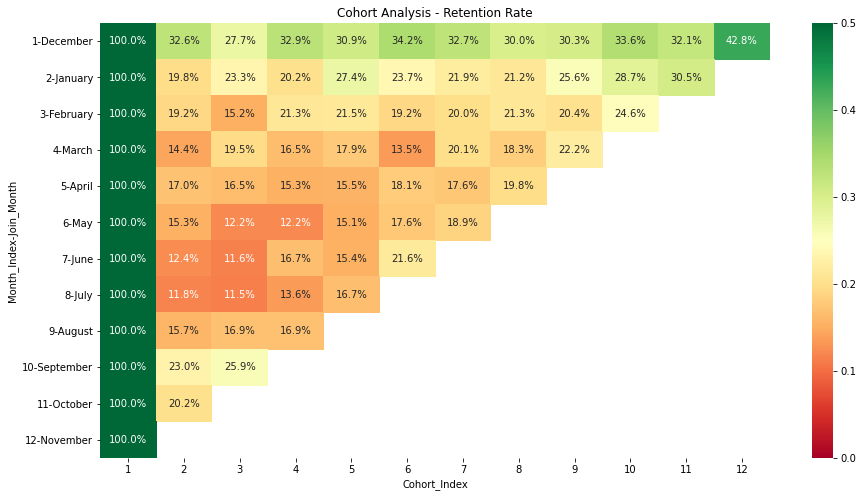

In [75]:
def yearly_retention():
    plt.figure(figsize = (15,8))
    plt.title('Cohort Analysis - Retention Rate')
    sns.heatmap(data = yearly_cohort_pct, annot = True, fmt = '.1%', vmin = 0.0, vmax = 0.5, cmap = "RdYlGn")
    plt.show()

yearly_retention()

Lets' find the total customer retention rate over the year.

In [76]:
user_retention = pd.DataFrame()
Total_Users = yearly_cohort_pivot.iloc[:,0].sum()
user_retention['All Users'] = pd.Series(Total_Users)
j=0
for i in yearly_cohort_data.Join_Month.unique():
    user_retention[i] = pd.Series(yearly_cohort_pivot.iloc[:,j].sum())
    j+=1
    
user_retention    

,All Users,December,January,February,March,April,May,June,July,August,September,October,November
0,5602.0,5602.0,1051.0,931.0,907.0,908.0,876.0,815.0,713.0,679.0,626.0,501.0,459.0


In [77]:
User_Retention_Rate = pd.DataFrame()
tot = user_retention['All Users']
user_retention_rate = round((user_retention.divide(tot, axis = 0)*100), 1)
user_retention_rate 

,All Users,December,January,February,March,April,May,June,July,August,September,October,November
0,100.0,100.0,18.8,16.6,16.2,16.2,15.6,14.5,12.7,12.1,11.2,8.9,8.2


Text(0, 0.5, 'Retention rate through year')

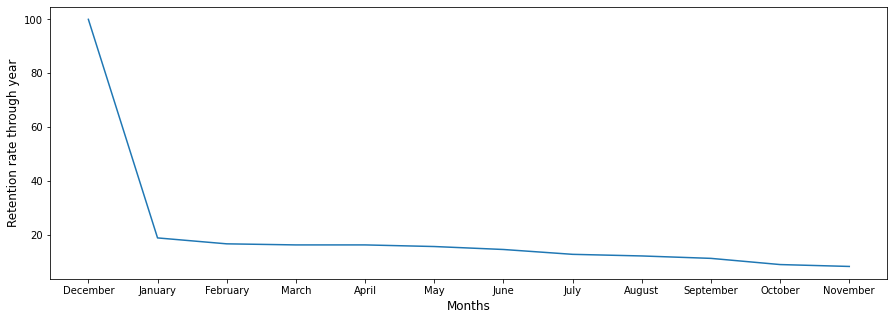

In [78]:
plt.figure(figsize = (15, 5))
plt.plot(user_retention_rate.iloc[0, 1:13])
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Retention rate through year', fontsize = 12)

The above plot shows the retention rate of customer over the whole year. The graph doesn't look good at all. Company needs to
do a lot of serious thinking and planning :)

### Spent Analysis

In [79]:
spent_cohort = yearly_cohort.copy()
spent_cohort

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount,Month,Invoice_Month,Cohort_Join_Month,Cohort_Index
0,558904,2011-07-04 16:18:00,75299,1.25,July,2011-07-01,2011-07-01,1
1,556072,2011-06-08 14:57:00,16126,30.00,June,2011-06-01,2011-02-01,5
2,551739,2011-05-04 10:58:00,18118,5.10,May,2011-05-01,2010-12-01,6
3,541658,2011-01-20 12:16:00,15529,0.85,January,2011-01-01,2010-12-01,2
4,538364,2010-12-10 17:26:00,14448,19.50,December,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40,May,2011-05-01,2011-02-01,4
357174,539451,2010-12-17 16:59:00,70084,16.98,December,2010-12-01,2010-12-01,1
357175,572302,2011-10-23 14:47:00,15427,0.39,October,2011-10-01,2011-10-01,1
357176,559339,2011-07-07 16:49:00,13752,75.00,July,2011-07-01,2011-04-01,4


In [80]:
spent_cohort_data = spent_cohort.groupby(['Cohort_Join_Month', 'Cohort_Index'])['Total_Amount'].sum().round(1).reset_index()
spent_cohort_data['Join_Month'] = [m.strftime('%B') for m in spent_cohort_data.Cohort_Join_Month]
spent_cohort_data.rename(columns = {'Total_Amount': 'Amount_Spent'}, inplace=True)
spent_cohort_data

,Cohort_Join_Month,Cohort_Index,Amount_Spent,Join_Month
0,2010-12-01,1,557308.6,December
1,2010-12-01,2,189452.7,December
2,2010-12-01,3,158767.4,December
3,2010-12-01,4,199869.7,December
4,2010-12-01,5,139649.0,December
...,...,...,...,...
73,2011-09-01,2,17443.5,September
74,2011-09-01,3,24658.4,September
75,2011-10-01,1,184442.3,October
76,2011-10-01,2,27303.8,October


In [81]:
spent_cohort_data['Month_Index'] = spent_cohort_data.Join_Month.map({'December' : 1, 'January' : 2, 'February' : 3, 
                                                                     'March' : 4, 'April' : 5, 'May' : 6, 'June' : 7, 
                                                                     'July' : 8, 'August' : 9, 'September' : 10, 
                                                                     'October' : 11, 'November' : 12}).astype(int)
spent_cohort_data

,Cohort_Join_Month,Cohort_Index,Amount_Spent,Join_Month,Month_Index
0,2010-12-01,1,557308.6,December,1
1,2010-12-01,2,189452.7,December,1
2,2010-12-01,3,158767.4,December,1
3,2010-12-01,4,199869.7,December,1
4,2010-12-01,5,139649.0,December,1
...,...,...,...,...,...
73,2011-09-01,2,17443.5,September,10
74,2011-09-01,3,24658.4,September,10
75,2011-10-01,1,184442.3,October,11
76,2011-10-01,2,27303.8,October,11


In [82]:
spent_cohort_pivot = spent_cohort_data.pivot_table(index = ['Month_Index', 'Join_Month'],
                                          columns = 'Cohort_Index',
                                          values = 'Amount_Spent')
spent_cohort_pivot

,Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Month_Index,Join_Month,,,,,,,,,,,,
1,December,557308.6,189452.7,158767.4,199869.7,139649.0,202535.7,196629.5,202312.3,216380.8,305675.2,294167.1,348983.6
2,January,236648.7,44659.3,53506.7,25542.1,60601.8,73827.7,61852.9,53697.2,59686.6,75679.3,85448.1,NaN
3,February,161589.8,17257.4,28580.4,32355.3,24717.4,22395.5,33930.9,38149.0,37748.2,41799.7,NaN,NaN
4,March,220875.0,16026.0,37769.6,28135.3,32383.6,26928.2,44082.9,43880.2,42552.0,NaN,NaN,NaN
5,April,130045.3,20184.9,18511.9,16852.8,18406.6,19764.3,20408.0,23634.8,NaN,NaN,NaN,NaN
6,May,147734.5,13410.6,13434.8,13734.5,19015.1,23505.5,21821.3,NaN,NaN,NaN,NaN,NaN
7,June,132900.2,9540.7,9811.1,20936.6,18688.5,29604.0,NaN,NaN,NaN,NaN,NaN,NaN
8,July,132630.8,8580.4,15264.6,15666.4,15377.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,August,124307.4,13106.3,21900.2,27784.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
total = spent_cohort_pivot.iloc[:,0]
spent_rate = spent_cohort_pivot.divide(total, axis = 0)
spent_rate.round(3)*100

,Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Month_Index,Join_Month,,,,,,,,,,,,
1,December,100.0,34.0,28.5,35.9,25.1,36.3,35.3,36.3,38.8,54.8,52.8,62.6
2,January,100.0,18.9,22.6,10.8,25.6,31.2,26.1,22.7,25.2,32.0,36.1,NaN
3,February,100.0,10.7,17.7,20.0,15.3,13.9,21.0,23.6,23.4,25.9,NaN,NaN
4,March,100.0,7.3,17.1,12.7,14.7,12.2,20.0,19.9,19.3,NaN,NaN,NaN
5,April,100.0,15.5,14.2,13.0,14.2,15.2,15.7,18.2,NaN,NaN,NaN,NaN
6,May,100.0,9.1,9.1,9.3,12.9,15.9,14.8,NaN,NaN,NaN,NaN,NaN
7,June,100.0,7.2,7.4,15.8,14.1,22.3,NaN,NaN,NaN,NaN,NaN,NaN
8,July,100.0,6.5,11.5,11.8,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,August,100.0,10.5,17.6,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


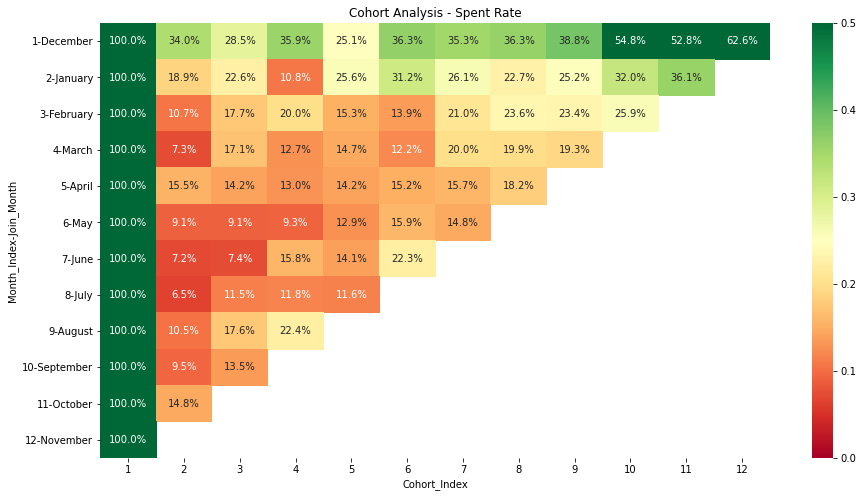

In [84]:
def spent_Retention():
    plt.figure(figsize = (15,8))
    plt.title('Cohort Analysis - Spent Rate')
    sns.heatmap(data = spent_rate, annot = True, fmt = '.1%', vmin = 0.0, vmax = 0.5, cmap = "RdYlGn")
    plt.show()

spent_Retention()

### RMF Modeling

In [85]:
Retail_RFM = pd.DataFrame(Retail_train.iloc[:, [0, 4, 6, 8]])
Retail_RFM

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount
0,558904,2011-07-04 16:18:00,75299,1.25
1,556072,2011-06-08 14:57:00,16126,30.00
2,551739,2011-05-04 10:58:00,18118,5.10
3,541658,2011-01-20 12:16:00,15529,0.85
4,538364,2010-12-10 17:26:00,14448,19.50
...,...,...,...,...
357173,C554864,2011-05-27 10:36:00,15122,-3.40
357174,539451,2010-12-17 16:59:00,70084,16.98
357175,572302,2011-10-23 14:47:00,15427,0.39
357176,559339,2011-07-07 16:49:00,13752,75.00


There are few customers whose transactions are divided in train and test, ie, few of their transactions are in train set and others in test set. This has led to a few discrepencies. For eg. for CustomerID = 12454, there are 2 invoices, 1 for items purchased and other for cancelled items. If we look at the codes below, it seems the customer has returned more items than he had purchased. In actual, the rest of the transaction details are in test set. So, when we calculate the monetary value for this customer it will be negative, as if the company owe the customer money. There are few records of this category.

I don't know how to deal with these records and I don't want to remove these records as these are genuine transactions with all the details available. So I left it as it is.

In [86]:
temp = Retail_train[(Retail_train['CustomerID'] == 12454) & (Retail_train['Quantity']<0)]
print(temp.loc[:, ['InvoiceNo', 'Quantity', 'InvoiceDate', 'CustomerID', 'Total_Amount']])
print('\nNo. of Items returned : ', len(temp))

       InvoiceNo  Quantity         InvoiceDate  CustomerID  Total_Amount
12024    C571499       -32 2011-10-17 15:07:00       12454        -88.00
41978    C571499       -72 2011-10-17 15:07:00       12454       -183.60
70205    C571499       -72 2011-10-17 15:07:00       12454       -183.60
75807    C571499      -200 2011-10-17 15:07:00       12454       -250.00
131774   C571499       -16 2011-10-17 15:07:00       12454        -66.40
163143   C571499       -48 2011-10-17 15:07:00       12454       -258.72
169555   C571499       -12 2011-10-17 15:07:00       12454        -97.80
170159   C571499       -48 2011-10-17 15:07:00       12454       -312.00
181955   C571499       -32 2011-10-17 15:07:00       12454       -190.40
273050   C571499       -48 2011-10-17 15:07:00       12454       -258.72
288198   C571499       -48 2011-10-17 15:07:00       12454       -312.00
305259   C571499       -48 2011-10-17 15:07:00       12454       -199.20
333040   C571499       -10 2011-10-17 15:07:00     

In [87]:
temp = Retail_train[(Retail_train['CustomerID'] == 12454) & (Retail_train['Quantity']>0)]
print(temp.loc[:, ['InvoiceNo', 'Quantity', 'InvoiceDate', 'CustomerID', 'Total_Amount']])
print('\nNo. of Items Purchased : ', len(temp))

       InvoiceNo  Quantity         InvoiceDate  CustomerID  Total_Amount
98734     571255        12 2011-10-14 17:13:00       12454         97.80
111986    571255        32 2011-10-14 17:13:00       12454        350.40
115489    571255        48 2011-10-14 17:13:00       12454        312.00
156596    571255        48 2011-10-14 17:13:00       12454        258.72
189621    571255        10 2011-10-14 17:13:00       12454        417.50
203052    571255        16 2011-10-14 17:13:00       12454         66.40
229496    571255        32 2011-10-14 17:13:00       12454        190.40
273817    571255        48 2011-10-14 17:13:00       12454        258.72
298591    571255        48 2011-10-14 17:13:00       12454        199.20
321284    571255        48 2011-10-14 17:13:00       12454        312.00
335926    571255        72 2011-10-14 17:13:00       12454        183.60
356179    571255        72 2011-10-14 17:13:00       12454        183.60

No. of Items Purchased :  12


### RFM Calculations

In [88]:
Retail_RFM['InvoiceDate'] = [d.date() for d in Retail_RFM['InvoiceDate']]
Retail_RFM

,InvoiceNo,InvoiceDate,CustomerID,Total_Amount
0,558904,2011-07-04,75299,1.25
1,556072,2011-06-08,16126,30.00
2,551739,2011-05-04,18118,5.10
3,541658,2011-01-20,15529,0.85
4,538364,2010-12-10,14448,19.50
...,...,...,...,...
357173,C554864,2011-05-27,15122,-3.40
357174,539451,2010-12-17,70084,16.98
357175,572302,2011-10-23,15427,0.39
357176,559339,2011-07-07,13752,75.00


In [89]:
Recent_Date = Retail_RFM.InvoiceDate.max()
print('Most recent date : ', Recent_Date)

Most recent date :  2011-11-30


#### Recency Calculation

In [90]:
Recency = Recent_Date - Retail_RFM.groupby('CustomerID')['InvoiceDate'].max()
Recency = Recency.astype(str)
index = Recency.index
for i, a in enumerate(Recency):
    Recency[index[i]] = a.split()[0]
    
Recency = Recency.astype(int)
Recency

CustomerID
10001    156
10040    362
10088    168
10138     92
10154    238
        ... 
99753    210
99786    149
99838    303
99859    240
99921    204
Name: InvoiceDate, Length: 5602, dtype: int32

#### Frequency Claculation

In [91]:
Frequency = Retail_RFM.groupby('CustomerID')['InvoiceNo'].count()
Frequency

CustomerID
10001     14
10040      3
10088     46
10138    132
10154      4
        ... 
99753      1
99786      8
99838     39
99859    139
99921     66
Name: InvoiceNo, Length: 5602, dtype: int64

#### Monetary Calculation

In [92]:
Monetary = Retail_RFM.groupby('CustomerID')['Total_Amount'].sum()
Monetary

CustomerID
10001     180.87
10040      11.00
10088     919.71
10138    1242.56
10154      23.45
          ...   
99753       4.95
99786     155.16
99838     538.45
99859    1135.41
99921    2747.06
Name: Total_Amount, Length: 5602, dtype: float64

In [93]:
RFM_Data = pd.DataFrame(columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary'])
RFM_Data['CustomerID'] = sorted(Retail_RFM.CustomerID.unique())
RFM_Data['Recency'] = Recency.values
RFM_Data['Frequency'] = Frequency.values
RFM_Data['Monetary'] = Monetary.values
RFM_Data

,CustomerID,Recency,Frequency,Monetary
0,10001,156,14,180.87
1,10040,362,3,11.00
2,10088,168,46,919.71
3,10138,92,132,1242.56
4,10154,238,4,23.45
...,...,...,...,...
5597,99753,210,1,4.95
5598,99786,149,8,155.16
5599,99838,303,39,538.45
5600,99859,240,139,1135.41


###### Computing Qurantiles : Dividing into 4 quantiles

For Recency, the lower it is, the better it is. So, lower values get higher quantile.

In [94]:
RFM_Data['Recency_Quantile'] = pd.qcut(RFM_Data['Recency'], 4, [4, 3, 2, 1])
RFM_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile
0,10001,156,14,180.87,2
1,10040,362,3,11.00,1
2,10088,168,46,919.71,2
3,10138,92,132,1242.56,2
4,10154,238,4,23.45,1
...,...,...,...,...,...
5597,99753,210,1,4.95,1
5598,99786,149,8,155.16,2
5599,99838,303,39,538.45,1
5600,99859,240,139,1135.41,1


For Frequency, the higher it is, the better it is. So higher values get higher quantile.

In [95]:
RFM_Data['Frequency_Quantile'] = pd.qcut(RFM_Data['Frequency'], 4, [1, 2, 3, 4])
RFM_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile
0,10001,156,14,180.87,2,2
1,10040,362,3,11.00,1,1
2,10088,168,46,919.71,2,3
3,10138,92,132,1242.56,2,4
4,10154,238,4,23.45,1,1
...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1
5598,99786,149,8,155.16,2,1
5599,99838,303,39,538.45,1,3
5600,99859,240,139,1135.41,1,4


For Monetary, the higher it is, the better it is. So higher values get higher quantile.

In [96]:
RFM_Data['Monetary_Quantile'] = pd.qcut(RFM_Data['Monetary'], 4, [1, 2, 3, 4])
RFM_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile
0,10001,156,14,180.87,2,2,2
1,10040,362,3,11.00,1,1,1
2,10088,168,46,919.71,2,3,3
3,10138,92,132,1242.56,2,4,4
4,10154,238,4,23.45,1,1,1
...,...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1,1
5598,99786,149,8,155.16,2,1,1
5599,99838,303,39,538.45,1,3,3
5600,99859,240,139,1135.41,1,4,4


In [97]:
print('Recency Quantile Counts :') 
print(RFM_Data.Recency_Quantile.value_counts(), '\n')
print('Frequency Quantile Counts :') 
print(RFM_Data.Frequency_Quantile.value_counts(), '\n')
print('Monetary Quantile Counts :')
print(RFM_Data.Monetary_Quantile.value_counts())

Recency Quantile Counts :
4    1424
1    1400
3    1393
2    1385
Name: Recency_Quantile, dtype: int64 

Frequency Quantile Counts :
1    1420
4    1399
3    1395
2    1388
Name: Frequency_Quantile, dtype: int64 

Monetary Quantile Counts :
4    1401
1    1401
3    1400
2    1400
Name: Monetary_Quantile, dtype: int64


Calculating RFM Score for each customer based on the quantiles of Recency, Frequency and Monetary.

In [98]:
RFM_Data['RFM_Score'] = RFM_Data.Recency_Quantile.astype(str) + RFM_Data.Frequency_Quantile.astype(str) + RFM_Data.Monetary_Quantile.astype(str)
RFM_Data.RFM_Score = RFM_Data.RFM_Score.astype('int64')
RFM_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score
0,10001,156,14,180.87,2,2,2,222
1,10040,362,3,11.00,1,1,1,111
2,10088,168,46,919.71,2,3,3,233
3,10138,92,132,1242.56,2,4,4,244
4,10154,238,4,23.45,1,1,1,111
...,...,...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1,1,111
5598,99786,149,8,155.16,2,1,1,211
5599,99838,303,39,538.45,1,3,3,133
5600,99859,240,139,1135.41,1,4,4,144


For the above table RFM_Score value 111 means the customer has highest recency, frequenct and monetary value. The highest in all
scores. Similarly, RFM_Score value 444 means the customer has lowest recency, frequency and monetary value.

In [99]:
Score = RFM_Data.RFM_Score.value_counts().sort_index()
print('Count of customers in each RFM Score value :')
print('============================================')
print(Score)

Count of customers in each RFM Score value :
111    481
112     88
113     21
114      7
121    102
      ... 
434    113
441      1
442     19
443    106
444    489
Name: RFM_Score, Length: 62, dtype: int64


Lets' find the percentage of total of customer in each RFM score group.

In [100]:
Tot = RFM_Data.RFM_Score.value_counts().sum()
print('Total no. of customers : ', Tot)

Total no. of customers :  5602


In [101]:
x = lambda x: x/Tot * 100
pct = RFM_Data.RFM_Score.value_counts().apply(x).sort_index()
print('Percentage of customers in RFM score group :')
print('============================================')
print(pct)

Percentage of customers in RFM score group :
111    8.586219
112    1.570868
113    0.374866
114    0.124955
121    1.820778
         ...   
434    2.017137
441    0.017851
442    0.339165
443    1.892181
444    8.729025
Name: RFM_Score, Length: 62, dtype: float64


Plotting the count of customers in each RFM score value

Text(0, 0.5, 'Percentage of Customer')

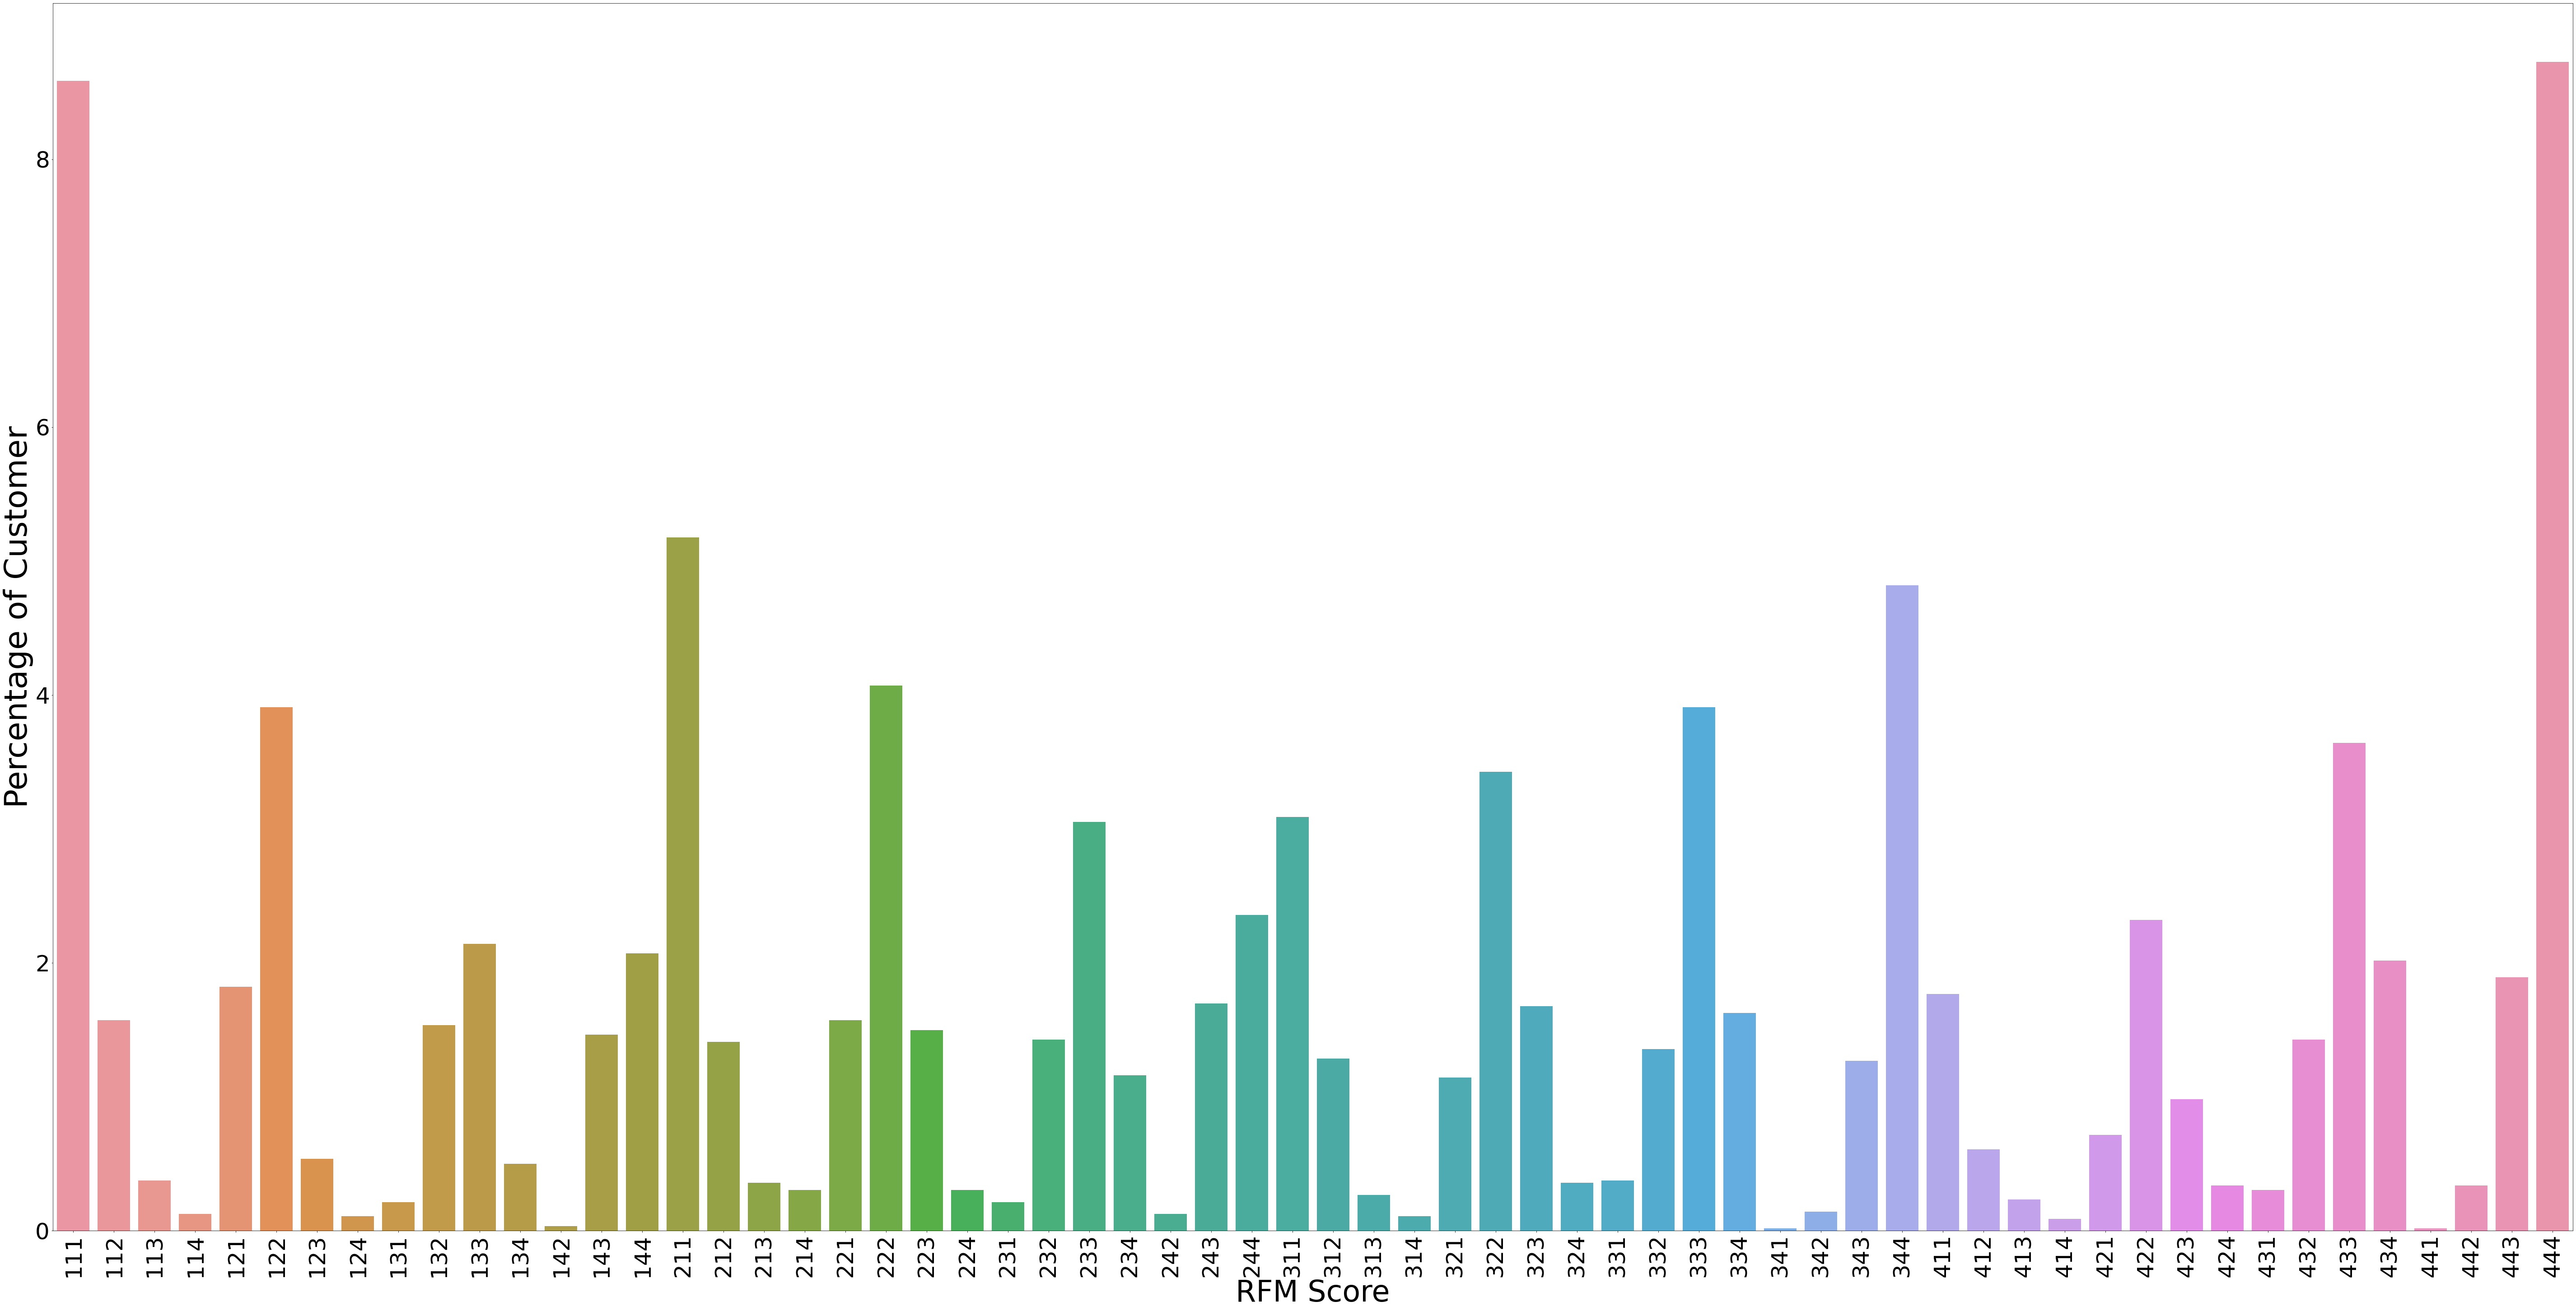

In [102]:
plt.figure(figsize = (100, 50))
sns.barplot(x=pct.index, y=pct.values)
plt.xticks(rotation = 'vertical', fontsize = 50)
plt.yticks(fontsize = 50)
plt.xlabel('RFM Score', fontsize = 65)
plt.ylabel('Percentage of Customer', fontsize = 70)

#### Customer Segmentation

###### Customers are divided into the following 6 segments:

1.) Best Customers – This group consists of those customers who are found in R-Tier-4, F-Tier-4 and M-Tier-3 or 4, 
		     meaning that they transacted recently, do so often and spend more than other customers. 
		     The shortened notations for this segment are 4-4-3 and 4-4-4; we’ll use these notation going forward.

2.) High-Spending New Customers – This group consists of those customers in 4-1-3 and 4-1-4. These are customers 
            who transacted only once, but very recently and they spent a lot.

3.) Lowest-Spending Active Loyal Customers – This group consists of those customers in segments 4-3-1, 4-3-2, 4-4-1 
            and 4-4-2 (they transacted recently and do so often, but spend the least).

4.) Churned Best Customers – This segment consists of those customers in groups 1-1-3, 1-1-4, 1-2-3 and 1-2-4 
            (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).

5.) Average Spending Active Loyal Customers - This is a group of people who are regular customers but they don't buy often
             and they spend average. They belong to groups 3-4-2, 3-4-3 and 4-3-3

6.) Other Customers or MVC (Minimum Viable Customers) - These are those customers who do not fall under any of the 
            above customer classifications.


In [104]:
def cust_seg(score):
    if score in [444, 443]:
        seg = 'BC'
        name = 'Best Customers'
    elif score in [414, 413]:
        seg = 'HSNC'
        name = 'High-spending New Customers'
    elif score in [431, 432, 441, 442]:
        seg = 'LSALC'
        name = 'Lowest-Spending Active Loyal Customers'
    elif score in [113, 11,4, 123, 124]:
        seg = 'CBC'
        name = 'Churned Best Customers'
    elif score in [342, 343, 433]:
        seg = 'ASALC'
        name = 'Average Spending Active Loyal Customers'
    else:
        seg = 'MVC'
        name = 'Minimum Viable Customers'
    return seg, name

In [105]:
segment = []
names = []
for i in range(len(RFM_Data)):
    seg, name = cust_seg(RFM_Data.RFM_Score[i])
    segment.append(seg)
    names.append(name)

RFM_Data['RFM_Segment'] = segment
RFM_Data['Segment_name'] = names
RFM_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score,RFM_Segment,Segment_name
0,10001,156,14,180.87,2,2,2,222,MVC,Minimum Viable Customers
1,10040,362,3,11.00,1,1,1,111,MVC,Minimum Viable Customers
2,10088,168,46,919.71,2,3,3,233,MVC,Minimum Viable Customers
3,10138,92,132,1242.56,2,4,4,244,MVC,Minimum Viable Customers
4,10154,238,4,23.45,1,1,1,111,MVC,Minimum Viable Customers
...,...,...,...,...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1,1,111,MVC,Minimum Viable Customers
5598,99786,149,8,155.16,2,1,1,211,MVC,Minimum Viable Customers
5599,99838,303,39,538.45,1,3,3,133,MVC,Minimum Viable Customers
5600,99859,240,139,1135.41,1,4,4,144,MVC,Minimum Viable Customers


In [110]:
print('Count of Customers in each Segment :')
print('====================================')
RFM_Data.RFM_Segment.value_counts()

Count of Customers in each Segment :


MVC      4532
BC        595
ASALC     283
LSALC     117
CBC        57
HSNC       18
Name: RFM_Segment, dtype: int64

In [91]:
RFM_Data.to_csv('RFM_Data.csv')

Text(0, 0.5, 'No. of Customers')

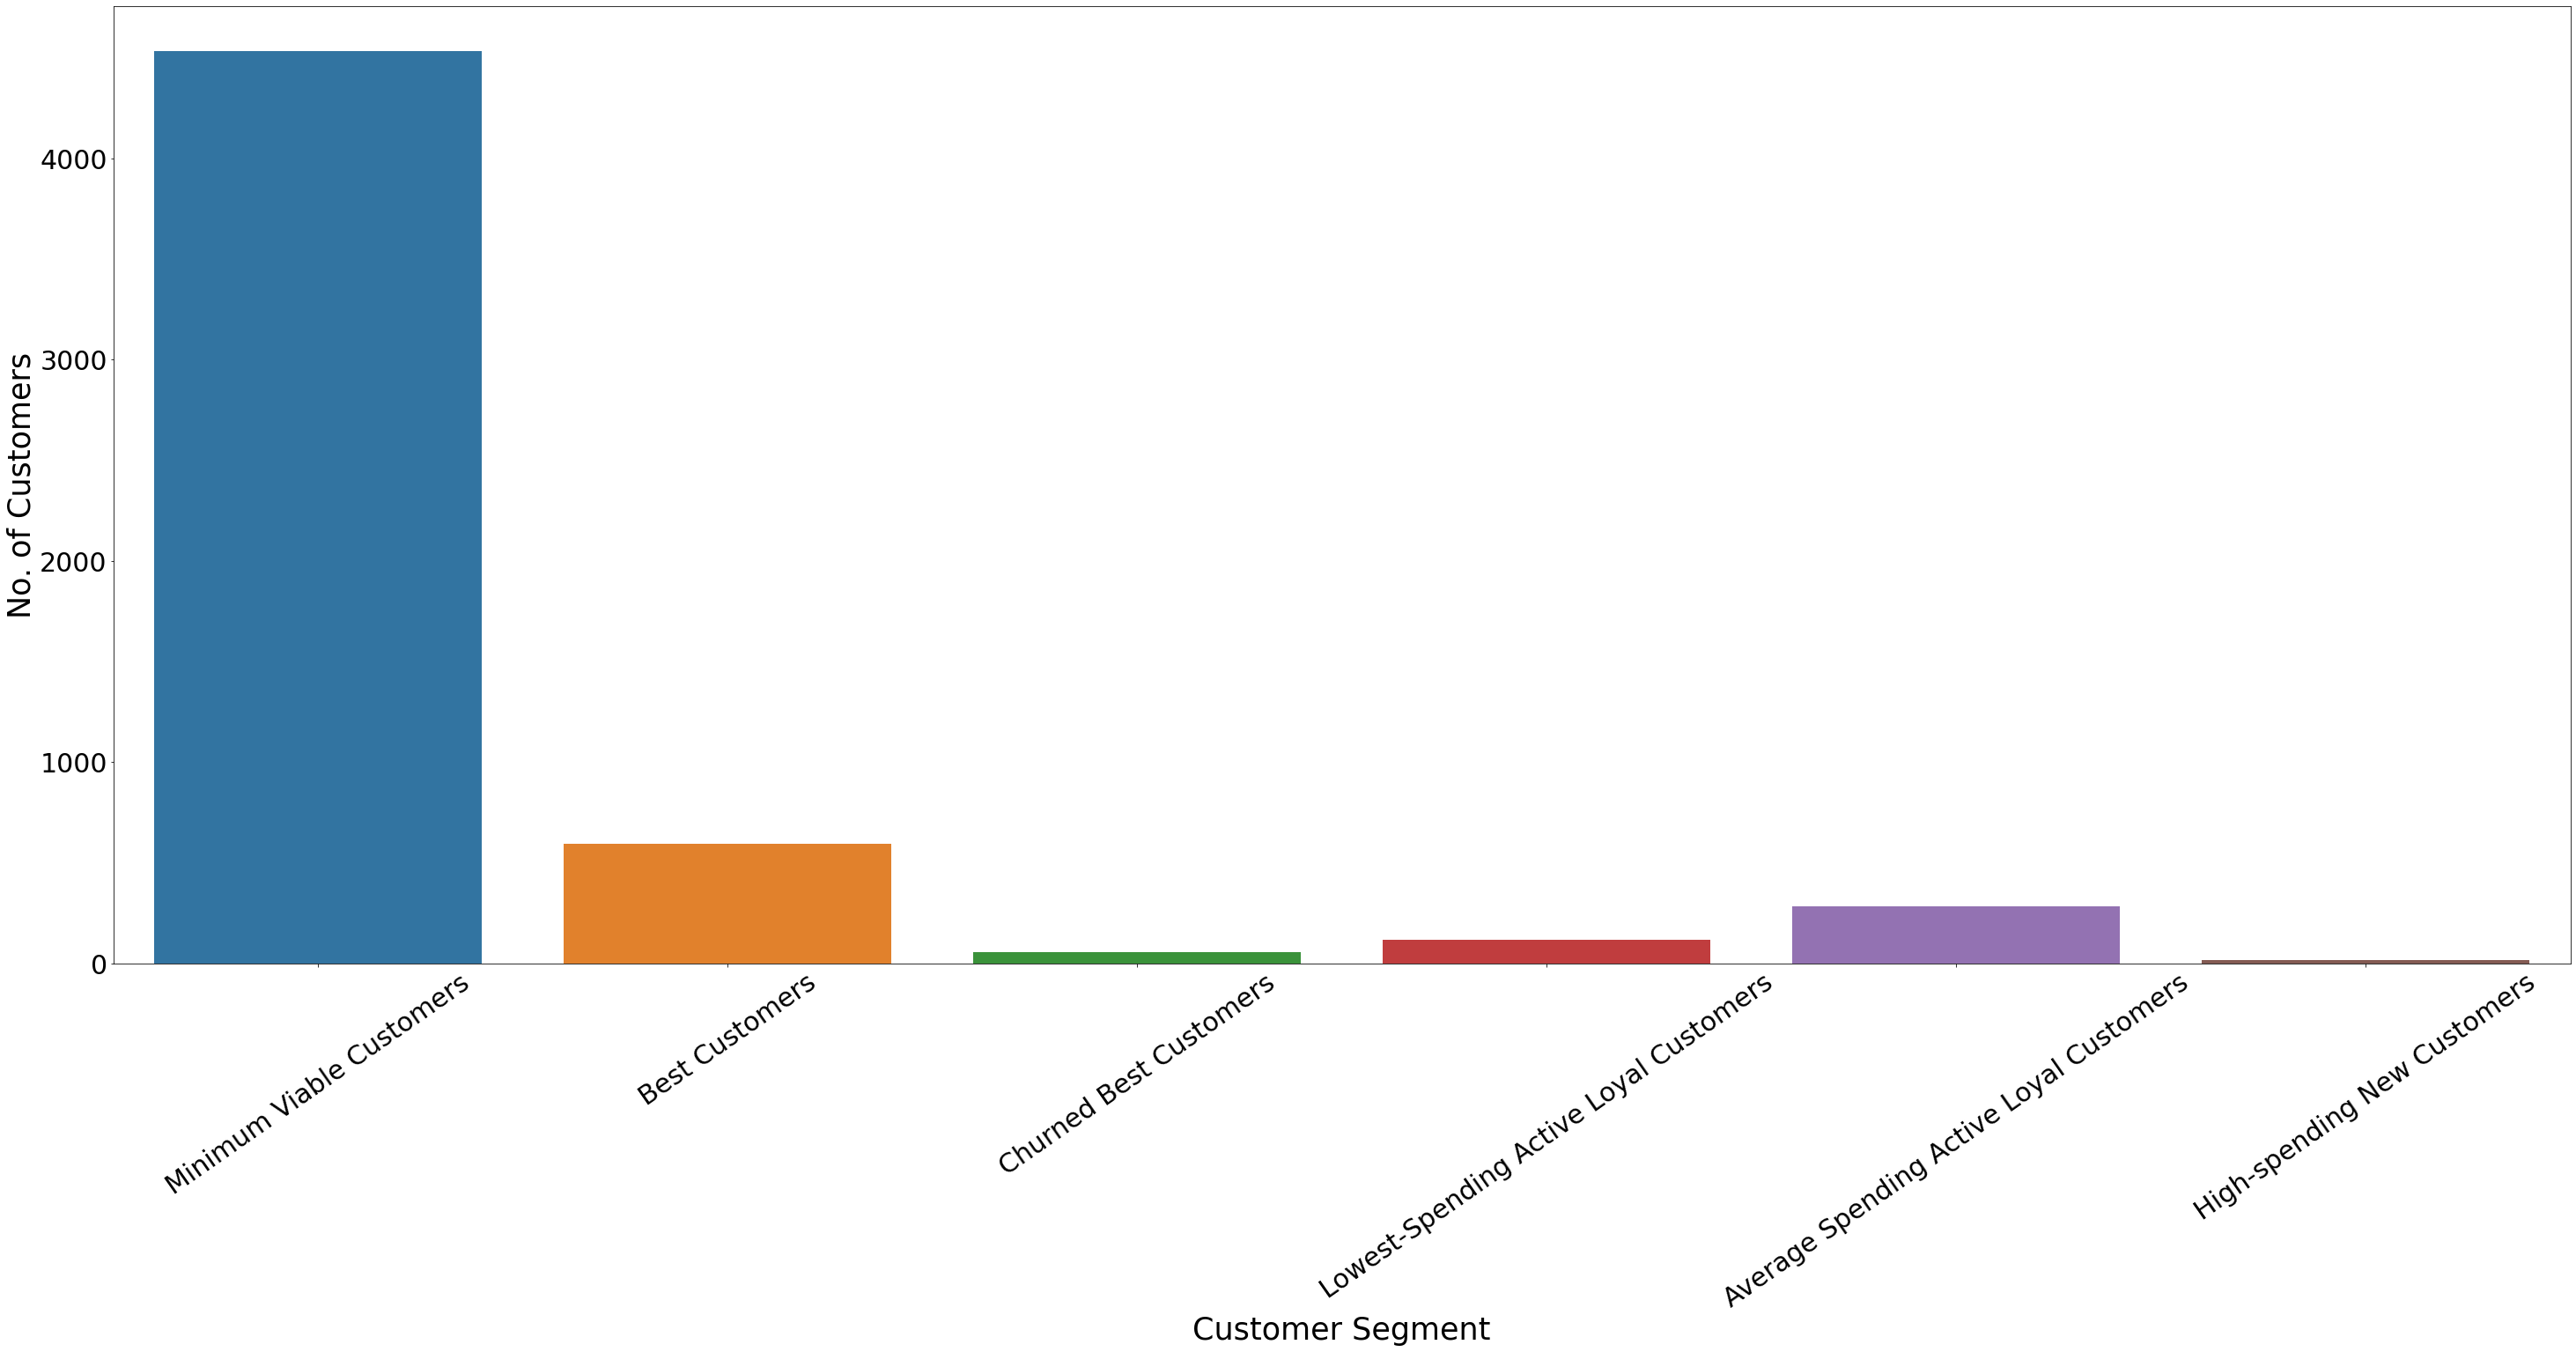

In [157]:
plt.figure(figsize = (50, 20))
sns.countplot(RFM_Data.Segment_name)
plt.xticks(fontsize = 30, rotation=35)
plt.yticks(fontsize = 30)
plt.xlabel('Customer Segment', fontsize = 35)
plt.ylabel('No. of Customers', fontsize = 35)

### Data Modeling : K-Means

In [136]:
KMeans_X = RFM_Data.copy()
KMeans_X

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score,RFM_Segment,Segment_name
0,10001,156,14,180.87,2,2,2,222,MVC,Minimum Viable Customers
1,10040,362,3,11.00,1,1,1,111,MVC,Minimum Viable Customers
2,10088,168,46,919.71,2,3,3,233,MVC,Minimum Viable Customers
3,10138,92,132,1242.56,2,4,4,244,MVC,Minimum Viable Customers
4,10154,238,4,23.45,1,1,1,111,MVC,Minimum Viable Customers
...,...,...,...,...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1,1,111,MVC,Minimum Viable Customers
5598,99786,149,8,155.16,2,1,1,211,MVC,Minimum Viable Customers
5599,99838,303,39,538.45,1,3,3,133,MVC,Minimum Viable Customers
5600,99859,240,139,1135.41,1,4,4,144,MVC,Minimum Viable Customers


###### Removing the extremes from Recency, Frequency and Monetary

{'whiskers': [<matplotlib.lines.Line2D at 0x1861abd2af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1861abae220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1861abd2790>],
 'medians': [<matplotlib.lines.Line2D at 0x1861abae8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1861abaebb0>],
 'means': []}

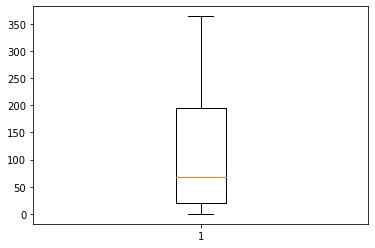

In [138]:
plt.boxplot(KMeans_X.Recency)

In [139]:
Q1 = KMeans_X.Recency.quantile(.25)
Q3 = KMeans_X.Recency.quantile(.75)
IQR = Q3 - Q1
print('25% Quantile of Recency = ', Q1)
print('75% Quantile of Recency = ', Q3)
print('Interquantile Range of Recency =', IQR)

25% Quantile of Recency =  20.0
75% Quantile of Recency =  195.0
Interquantile Range of Recency = 175.0


In [140]:
KMeans_X = KMeans_X[(KMeans_X.Recency >= Q1-1.5*IQR) & (KMeans_X.Recency <= Q3+1.5*IQR)]
KMeans_X

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score,RFM_Segment,Segment_name
0,10001,156,14,180.87,2,2,2,222,MVC,Minimum Viable Customers
1,10040,362,3,11.00,1,1,1,111,MVC,Minimum Viable Customers
2,10088,168,46,919.71,2,3,3,233,MVC,Minimum Viable Customers
3,10138,92,132,1242.56,2,4,4,244,MVC,Minimum Viable Customers
4,10154,238,4,23.45,1,1,1,111,MVC,Minimum Viable Customers
...,...,...,...,...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1,1,111,MVC,Minimum Viable Customers
5598,99786,149,8,155.16,2,1,1,211,MVC,Minimum Viable Customers
5599,99838,303,39,538.45,1,3,3,133,MVC,Minimum Viable Customers
5600,99859,240,139,1135.41,1,4,4,144,MVC,Minimum Viable Customers


{'whiskers': [<matplotlib.lines.Line2D at 0x1861a2205e0>,
 'caps': [<matplotlib.lines.Line2D at 0x18619d75d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1861a2209a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18617961790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1862582b220>],
 'means': []}

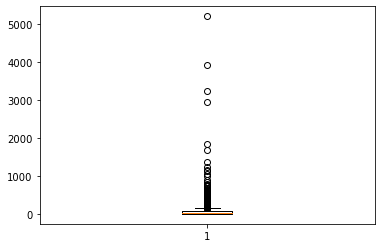

In [141]:
plt.boxplot(KMeans_X.Frequency)

In [142]:
Q1 = KMeans_X.Frequency.quantile(.25)
Q3 = KMeans_X.Frequency.quantile(.75)
IQR = Q3 - Q1
print('25% Quantile of Frequency = ', Q1)
print('75% Quantile of Frequency = ', Q3)
print('Interquantile Range of Frequency =', IQR)

25% Quantile of Frequency =  10.0
75% Quantile of Frequency =  73.0
Interquantile Range of Frequency = 63.0


In [143]:
KMeans_X = KMeans_X[(KMeans_X.Frequency >= Q1-1.5*IQR) & (KMeans_X.Frequency <= Q3+1.5*IQR)]
KMeans_X

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score,RFM_Segment,Segment_name
0,10001,156,14,180.87,2,2,2,222,MVC,Minimum Viable Customers
1,10040,362,3,11.00,1,1,1,111,MVC,Minimum Viable Customers
2,10088,168,46,919.71,2,3,3,233,MVC,Minimum Viable Customers
3,10138,92,132,1242.56,2,4,4,244,MVC,Minimum Viable Customers
4,10154,238,4,23.45,1,1,1,111,MVC,Minimum Viable Customers
...,...,...,...,...,...,...,...,...,...,...
5597,99753,210,1,4.95,1,1,1,111,MVC,Minimum Viable Customers
5598,99786,149,8,155.16,2,1,1,211,MVC,Minimum Viable Customers
5599,99838,303,39,538.45,1,3,3,133,MVC,Minimum Viable Customers
5600,99859,240,139,1135.41,1,4,4,144,MVC,Minimum Viable Customers


{'whiskers': [<matplotlib.lines.Line2D at 0x18625ae11c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18619e414c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18625ae1100>],
 'medians': [<matplotlib.lines.Line2D at 0x18619e1e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18619e1e430>],
 'means': []}

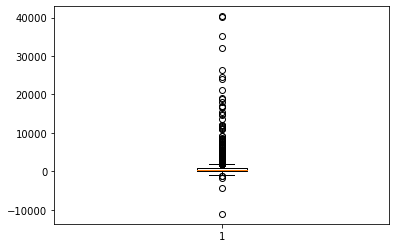

In [144]:
plt.boxplot(KMeans_X.Monetary)

In [145]:
Q1 = KMeans_X.Monetary.quantile(.25)
Q3 = KMeans_X.Monetary.quantile(.75)
IQR = Q3 - Q1
print('25% Quantile of Monetary = ', Q1)
print('75% Quantile of Monetary = ', round((Q3),1))
print('Interquantile Range of Monetary =', round((IQR),1))

25% Quantile of Monetary =  150.27499999999998
75% Quantile of Monetary =  884.8
Interquantile Range of Monetary = 734.5


In [146]:
KMeans_X = KMeans_X[(KMeans_X.Monetary >= Q1-1.5*IQR) & (KMeans_X.Monetary <= Q3+1.5*IQR)]
KMeans_Data = KMeans_X.copy().reset_index(drop=True)
KMeans_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score,RFM_Segment,Segment_name
0,10001,156,14,180.87,2,2,2,222,MVC,Minimum Viable Customers
1,10040,362,3,11.00,1,1,1,111,MVC,Minimum Viable Customers
2,10088,168,46,919.71,2,3,3,233,MVC,Minimum Viable Customers
3,10138,92,132,1242.56,2,4,4,244,MVC,Minimum Viable Customers
4,10154,238,4,23.45,1,1,1,111,MVC,Minimum Viable Customers
...,...,...,...,...,...,...,...,...,...,...
4755,99588,246,44,577.05,1,3,3,133,MVC,Minimum Viable Customers
4756,99753,210,1,4.95,1,1,1,111,MVC,Minimum Viable Customers
4757,99786,149,8,155.16,2,1,1,211,MVC,Minimum Viable Customers
4758,99838,303,39,538.45,1,3,3,133,MVC,Minimum Viable Customers


#### Scaling Data

In [147]:
scaler = StandardScaler()
Scaled_Data = pd.DataFrame(scaler.fit_transform(KMeans_Data.iloc[:, 1:4]))
Scaled_Data

,0,1,2
0,0.296552,-0.579538,-0.663496
1,2.182366,-0.882648,-1.029598
2,0.406405,0.302236,0.928845
3,-0.289332,2.672003,1.624647
4,1.047216,-0.855093,-1.002766
...,...,...,...
4755,1.120451,0.247125,0.190347
4756,0.790892,-0.937759,-1.042637
4757,0.232471,-0.744871,-0.718906
4758,1.642254,0.109348,0.107157


#### Elbow method to fid the optimum value of K

In [122]:
Inertia = []
for i in range(1, 26):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    model.fit(Scaled_Data)
    Inertia.append(model.inertia_)

In [123]:
clusters = range(1, 26)
df_elbow = pd.DataFrame(columns = ['No_of_Clusters', 'Cost'])
df_elbow['No_of_Clusters'] = clusters
df_elbow['Cost'] = Inertia

In [124]:
df_elbow.to_csv('Cost_Clusters.csv')

Text(0, 0.5, 'Inertia')

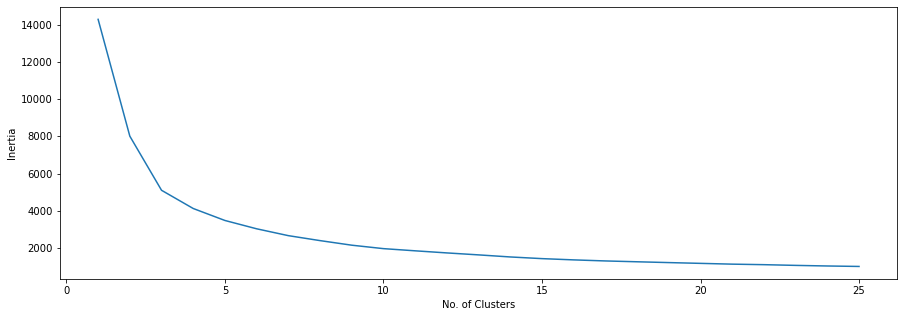

In [125]:
plt.figure(figsize = (15, 5))
plt.plot(range(1, 26), Inertia)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

#### The last elbow is at 3.

In [148]:
KMeans_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
Clusters = KMeans_model.fit_predict(Scaled_Data)

In [149]:
KMeans_model.labels_

array([1, 1, 0, ..., 1, 1, 0])

In [150]:
KMeans_model.inertia_

5101.083783686159

In [151]:
KMeans_model.cluster_centers_

array([[-0.39099991,  1.43882206,  1.43981397],
       [ 1.17419119, -0.54869777, -0.59582631],
       [-0.64530182, -0.3450906 , -0.31162176]])

In [152]:
KMeans_Data['Cluster_ID'] = KMeans_model.labels_
KMeans_Data

,CustomerID,Recency,Frequency,Monetary,Recency_Quantile,Frequency_Quantile,Monetary_Quantile,RFM_Score,RFM_Segment,Segment_name,Cluster_ID
0,10001,156,14,180.87,2,2,2,222,MVC,Minimum Viable Customers,1
1,10040,362,3,11.00,1,1,1,111,MVC,Minimum Viable Customers,1
2,10088,168,46,919.71,2,3,3,233,MVC,Minimum Viable Customers,0
3,10138,92,132,1242.56,2,4,4,244,MVC,Minimum Viable Customers,0
4,10154,238,4,23.45,1,1,1,111,MVC,Minimum Viable Customers,1
...,...,...,...,...,...,...,...,...,...,...,...
4755,99588,246,44,577.05,1,3,3,133,MVC,Minimum Viable Customers,1
4756,99753,210,1,4.95,1,1,1,111,MVC,Minimum Viable Customers,1
4757,99786,149,8,155.16,2,1,1,211,MVC,Minimum Viable Customers,1
4758,99838,303,39,538.45,1,3,3,133,MVC,Minimum Viable Customers,1


In [153]:
print('Count of Customers in each Clusters :')
print('=====================================')
KMeans_Data.Cluster_ID.value_counts()

Count of Customers in each Clusters :


2    2138
1    1529
0    1093
Name: Cluster_ID, dtype: int64

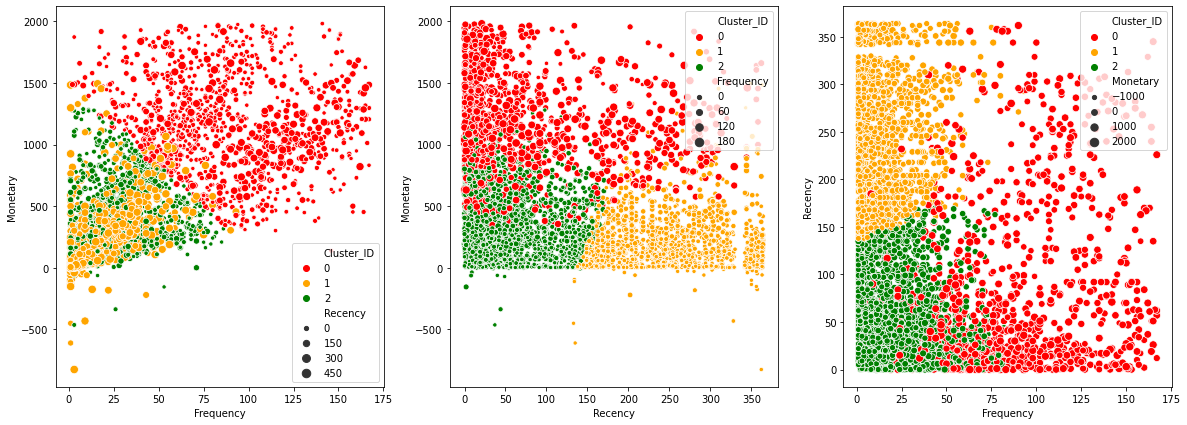

In [154]:
fig, axs = plt.subplots(1,3, figsize=(20, 7))
sns.scatterplot(data=KMeans_Data, x='Frequency', y='Monetary', hue='Cluster_ID', size='Recency', 
                palette=['Red', 'Orange', 'Green'] , ax=axs[0])

sns.scatterplot(data=KMeans_Data, x='Recency', y='Monetary', hue='Cluster_ID', size='Frequency', 
                palette=['Red', 'Orange', 'Green'] ,ax=axs[1])

sns.scatterplot(data=KMeans_Data, x='Frequency', y='Recency', hue='Cluster_ID', size='Monetary', 
                palette=['Red', 'Orange', 'Green'] ,ax=axs[2])

###### Calculating the average of Recency, Frequency and Monetary for each Clusters

In [155]:
Avg = pd.DataFrame(KMeans_Data.groupby('Cluster_ID', as_index=False).aggregate({'Recency': 'mean',
                                                                                'Frequency':'mean',
                                                                                'Monetary':'mean'}))
Avg.rename(columns={'Recency':'Avg_Recency', 'Frequency':'Avg_Frequency', 'Monetary':'Avg_Monetary'}, inplace=True)
Avg

,Cluster_ID,Avg_Recency,Avg_Frequency,Avg_Monetary
0,0,80.988106,87.350412,1157.694886
1,1,252.263571,15.094179,212.161164
2,2,53.382601,22.543499,344.526483


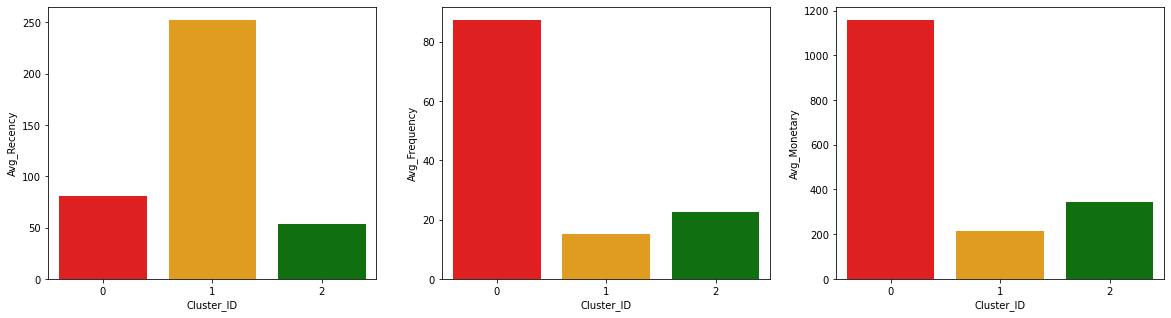

In [156]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(x="Cluster_ID", y="Avg_Recency", data=Avg, palette=['Red', 'Orange', 'Green'], ax=axs[0])
sns.barplot(x="Cluster_ID", y="Avg_Frequency", data=Avg, palette=['Red', 'Orange', 'Green'], ax=axs[1])
sns.barplot(x="Cluster_ID", y="Avg_Monetary", data=Avg, palette=['Red', 'Orange', 'Green'], ax=axs[2])

#### END